In [2]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

### Câu 1 (3.0 điểm):

a. Đọc dữ liệu từ file trên vào DataFrame có tên df và hiển thị: 5 dòng đầu tiên, 5 dòng ngẫu nhiên, kiểu thước df, số dòng df, số cột df.


In [3]:
df = pd.read_csv("../data/C62.csv")

In [4]:
[hang, cot] = df.shape

print("Số hàng:", hang)
print("Số cột:", cot)

Số hàng: 100
Số cột: 4


In [5]:
print("Kích thước df:", df.size)

Kích thước df: 400


In [6]:
print("5 dòng đầu")
df.head(5)

5 dòng đầu


,Mã Lô,Diện Tích,Mặt Tiền,Loại Đất
0,L01,272,36,10
1,L02,147,20,1
2,L03,217,50,10
3,L04,292,15,1
4,L05,167,46,15


In [7]:
print("5 dòng cuối")
df.tail(5)

5 dòng cuối


,Mã Lô,Diện Tích,Mặt Tiền,Loại Đất
95,L96,243,53,15
96,L97,248,50,15
97,L98,286,37,20
98,L99,123,20,20
99,L100,241,38,3


Thống kê số lượng lô đất nông nghiệp và đất không thời hạn và vẽ biểu đồ pie minh họa.

In [8]:
df_datnongnghiep = df[df["Loại Đất"] == 1 ]
df_datkhongthoihan = df[df["Loại Đất"] == 2 ]

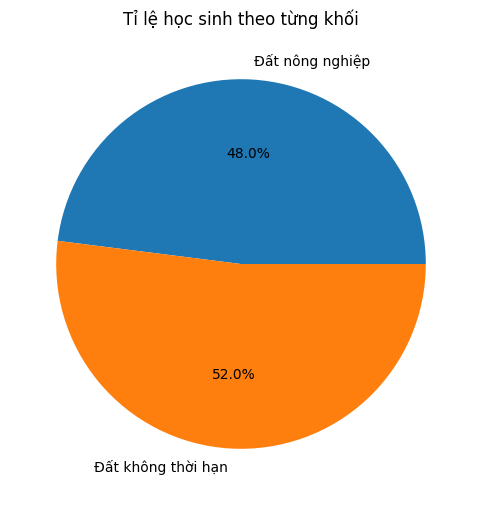

In [9]:
sizes = [len(df_datnongnghiep), len(df_datkhongthoihan)]
labels= ["Đất nông nghiệp", "Đất không thời hạn"]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.title("Tỉ lệ học sinh theo từng khối")
plt.show()

In ra giá trị thống kê trung bình (mean) diện tích cho các lô có thời hạn trên 10 năm.

In [10]:
res = df[df["Loại Đất"] >= 10]["Diện Tích"].mean()

print("Trung bình (mean) diện tích cho các lô có thời hạn trên 10 năm:", res)

Trung bình (mean) diện tích cho các lô có thời hạn trên 10 năm: 204.4126984126984


### Câu 2 (2.0 điểm): 
Thêm cột TienGiaDat (triệu) vào DataFrame với các quy tắc sau:

- Đất nông nghiệp: Giá trị lô đất = Diện tích x 2.
- Đất ở không xác định thời hạn: Giá trị lô đất = Diện tích lô đất x mặt tiền.
- Đất có thời hạn: Ghi "Không xác định giá trị".



In [11]:
def calc_tiengiadat(row):
  loai_dat = row["Loại Đất"]
  dien_tich = row["Diện Tích"]
  mat_tien = row["Mặt Tiền"]

  if (loai_dat == 1):
    return dien_tich * 2
  elif (loai_dat == 2):
    return dien_tich * mat_tien
  else:
    return "Không xác định giá trị"
  
df["TienGiaDat"] = df.apply(calc_tiengiadat, axis=1)

In [12]:
df.head()

,Mã Lô,Diện Tích,Mặt Tiền,Loại Đất,TienGiaDat
0,L01,272,36,10,Không xác định giá trị
1,L02,147,20,1,294
2,L03,217,50,10,Không xác định giá trị
3,L04,292,15,1,584
4,L05,167,46,15,Không xác định giá trị


### Câu 3 (2.0 điểm): 
Thêm một cột mới vào DataFrame có tên là ChuyenDoi, được tính như sau:

- Đối với đất nông nghiệp (LoaiDat = 1): ChuyenDoi = Diện tích x 15 (triệu).
- Đối với các loại đất khác: ghi là "Chưa có công văn".


In [13]:
def calc_chuyendoi(row):
  loai_dat = row["Loại Đất"]
  dien_tich = row["Diện Tích"]
  if (loai_dat == 1):
    return dien_tich * 15 * 10 ** 7
  else:
    return "Chưa có công văn"

df["ChuyenDoi"] = df.apply(calc_chuyendoi, axis=1)

In [14]:
df[df["ChuyenDoi"] != "Chưa có công văn"]

,Mã Lô,Diện Tích,Mặt Tiền,Loại Đất,TienGiaDat,ChuyenDoi
1,L02,147,20,1,294,22050000000
3,L04,292,15,1,584,43800000000
12,L13,188,49,1,376,28200000000
50,L51,283,23,1,566,42450000000
53,L54,228,23,1,456,34200000000
56,L57,153,18,1,306,22950000000
63,L64,142,28,1,284,21300000000
65,L66,131,31,1,262,19650000000
69,L70,269,40,1,538,40350000000
71,L72,135,34,1,270,20250000000


### Câu 4 (3.0 điểm): 


Giả sử diện tích đất có phân phối chuẩn. Hãy xây dựng hàm mật độ xác suất cho diện tích đất. 



In [15]:
new_df =  pd.DataFrame(df["Diện Tích"])

# Kỳ vọng
mean = new_df.mean() 
# Độ lệch
std = new_df.std()

x_values = np.linspace(mean - 3*std, mean + 3*std, 1000)
pdf_values = norm.pdf(x_values, mean, std)


Vẽ đồ thị phân phối chuẩn cho diện tích đất. Điều chỉnh các giới hạn trục x (xlim) và trục y (ylim) cho phù hợp với đồ thị. 

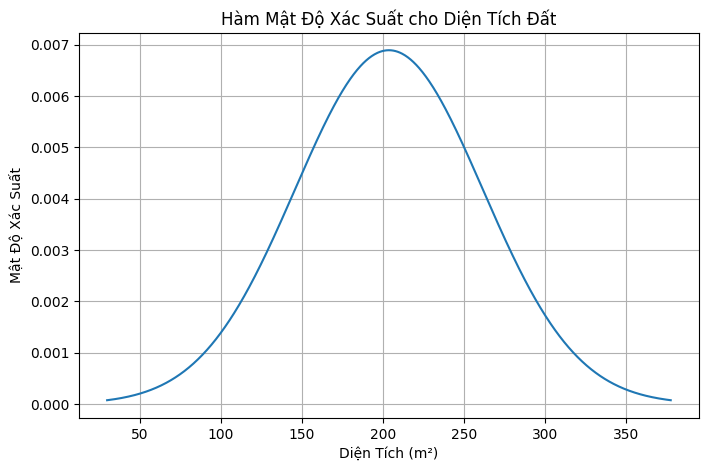

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(x_values, pdf_values, label='PDF')
plt.title('Hàm Mật Độ Xác Suất cho Diện Tích Đất')
plt.xlabel('Diện Tích (m²)')
plt.ylabel('Mật Độ Xác Suất')
plt.grid(True)
plt.show()

Tính và cho biết bao nhiêu phần trăm lô đất có diện tích dưới 120 mét vuông.

In [19]:
res = norm.cdf(120, mean, std) * 100

print("phần trăm lô đất có diện tích dưới 120 mét vuông:", res)

phần trăm lô đất có diện tích dưới 120 mét vuông: [7.4330604]
